In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

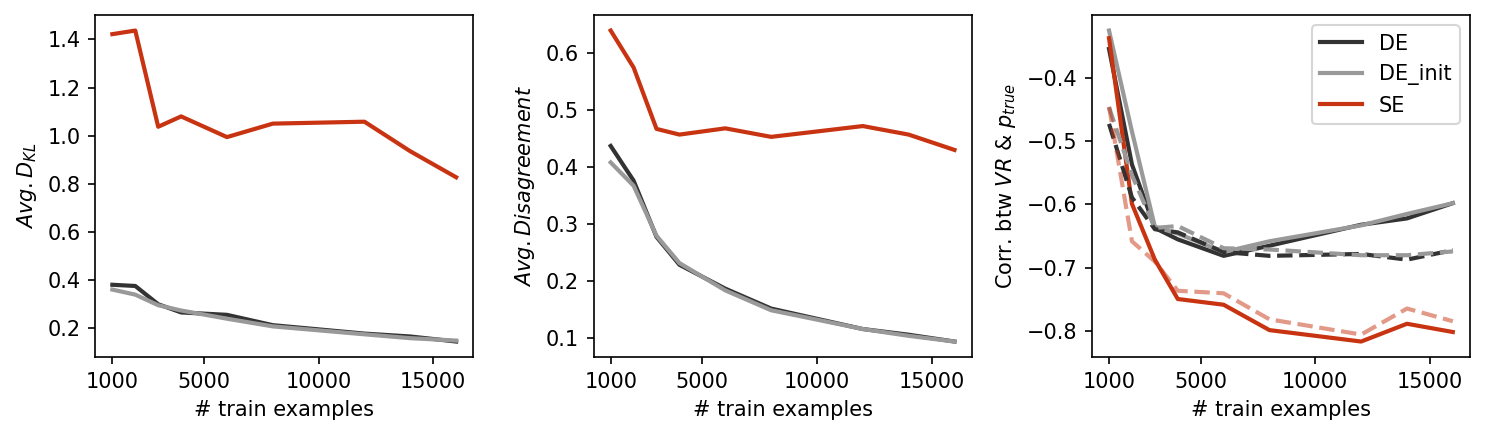

In [2]:
klds = pd.DataFrame({
    "train_size": [1000, 2000, 3000, 4000, 6000, 8000, 12000, 14000, 16000],
    "DE":      [0.380, 0.375, 0.299, 0.265, 0.255, 0.212, 0.177, 0.165, 0.144],
    "DE_init": [0.360, 0.339, 0.295, 0.273, 0.239, 0.207, 0.174, 0.158, 0.148],
    "SE":      [1.422, 1.437, 1.037, 1.080, 0.994, 1.050, 1.058, 0.935, 0.827],
})

disagrees = pd.DataFrame({
    "train_size": [1000, 2000, 3000, 4000, 6000, 8000, 12000, 14000, 16000],
    "DE":      [0.437, 0.376, 0.277, 0.228, 0.186, 0.151, 0.115, 0.105, 0.093],
    "DE_init": [0.408, 0.367, 0.279, 0.231, 0.183, 0.148, 0.115, 0.103, 0.093],
    "SE":      [0.640, 0.575, 0.467, 0.457, 0.468, 0.453, 0.472, 0.457, 0.430],
})

corrs = pd.DataFrame({
    "train_size": [1000, 2000, 3000, 4000, 6000, 8000, 12000, 14000, 16000],
    "DE":      [-0.473, -0.589, -0.639, -0.644, -0.675, -0.681, -0.678, -0.687, -0.672],
    "DE_init": [-0.447, -0.554, -0.637, -0.634, -0.669, -0.671, -0.680, -0.680, -0.674],
    "SE":      [-0.446, -0.658, -0.690, -0.736, -0.740, -0.781, -0.805, -0.764, -0.784],
})

rank_corrs = pd.DataFrame({
    "train_size": [1000, 2000, 3000, 4000, 6000, 8000, 12000, 14000, 16000],
    "DE":      [-0.355, -0.537, -0.637, -0.655, -0.681, -0.665, -0.632, -0.622, -0.598],
    "DE_init": [-0.326, -0.485, -0.635, -0.646, -0.675, -0.658, -0.633, -0.615, -0.598],
    "SE":      [-0.338, -0.599, -0.687, -0.749, -0.758, -0.798, -0.816, -0.788, -0.801],
})

fig, ax = plt.subplots(1, 3, dpi=150, figsize=(10, 3))

ax[0].plot(klds['train_size'], klds['DE'], label="DE", linewidth=2, color='#333333')
ax[0].plot(klds['train_size'], klds['DE_init'], label="DE_init", linewidth=2, color='#999999')
ax[0].plot(klds['train_size'], klds['SE'], label="SE", linewidth=2, color='#C83411')
ax[0].set_xticks([1000, 5000, 10000, 15000])
ax[0].set_xlabel(r"# train examples")
ax[0].set_ylabel(r"$Avg. D_{KL}$")

ax[1].plot(disagrees['train_size'], disagrees['DE'], label="DE", linewidth=2, color='#333333')
ax[1].plot(disagrees['train_size'], disagrees['DE_init'], label="DE_init", linewidth=2, color='#999999')
ax[1].plot(disagrees['train_size'], disagrees['SE'], label="SE", linewidth=2, color='#C83411')
ax[1].set_xticks([1000, 5000, 10000, 15000])
ax[1].set_xlabel(r"# train examples")
ax[1].set_ylabel(r"$Avg. Disagreement$")

ax[2].plot(rank_corrs['train_size'], rank_corrs['DE'], label="DE", linewidth=2, color='#333333')
ax[2].plot(rank_corrs['train_size'], rank_corrs['DE_init'], label="DE_init", linewidth=2, color='#999999')
ax[2].plot(rank_corrs['train_size'], rank_corrs['SE'], label="SE", linewidth=2, color='#C83411')
ax[2].plot(corrs['train_size'], corrs['DE'], linewidth=2, color='#333333', linestyle='--')
ax[2].plot(corrs['train_size'], corrs['DE_init'], linewidth=2, color='#999999', linestyle='--')
ax[2].plot(corrs['train_size'], corrs['SE'], linewidth=2, color='#C83411', alpha=0.5, linestyle='--')
ax[2].legend()
ax[2].set_xticks([1000, 5000, 10000, 15000])
ax[2].set_xlabel(r"# train examples")
ax[2].set_ylabel(r"Corr. btw $VR$ & $p_{true}$")

fig.tight_layout()

fig.savefig("kld_dis_corr.pdf")

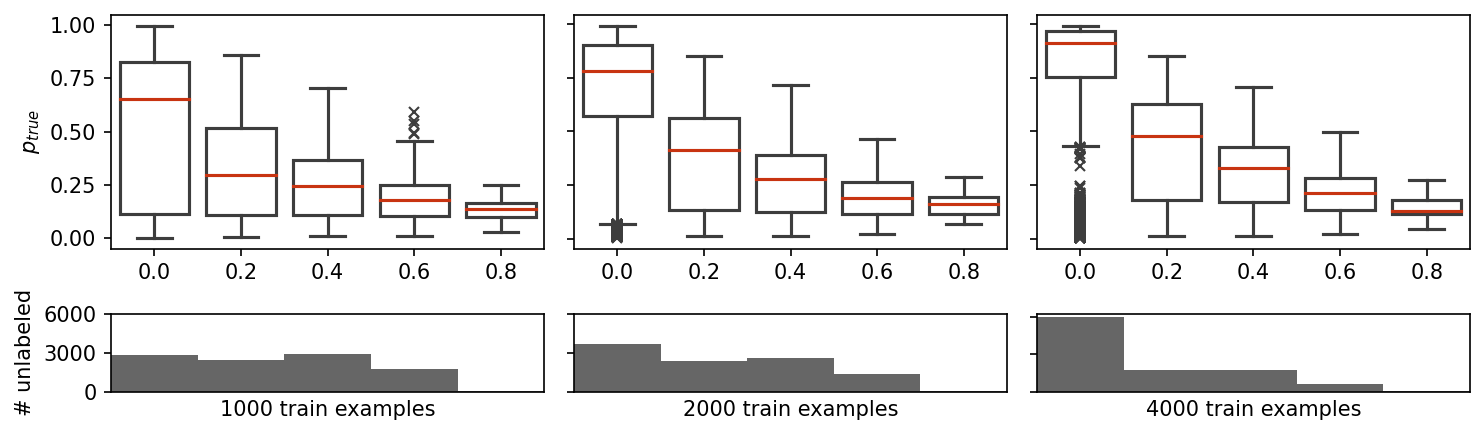

In [3]:
ens_1000 = np.load("ens_1000.npy")
ens_1000_x = np.round(ens_1000[0], 2)
ens_2000 = np.load("ens_2000.npy")
ens_2000_x = np.round(ens_2000[0], 2)
ens_4000 = np.load("ens_4000.npy")
ens_4000_x = np.round(ens_4000[0], 2)

fig, axes = plt.subplots(2, 3, gridspec_kw={'height_ratios': [3, 1]}, dpi=150, figsize=(10, 3))

PROPS = {
    'boxprops': {'facecolor':'none'},
    'medianprops': {'color':'#C83411'},
    'flierprops': {"marker": "x"},
}

bx0 = sns.boxplot(ax=axes[0][0], x=ens_1000_x, y=ens_1000[1], **PROPS)
bx1 = sns.boxplot(ax=axes[0][1], x=ens_2000_x, y=ens_2000[1], **PROPS)
bx2 = sns.boxplot(ax=axes[0][2], x=ens_4000_x, y=ens_4000[1], **PROPS)

axes[0][0].set_ylabel(r"$p_{true}$")
bx1.set(yticklabels=[])
bx2.set(yticklabels=[])

axes[1][0].bar(x=[0., 0.2, 0.4, 0.6, 0.8], height=[2842, 2462, 2916, 1725,   55], width=0.2, align='edge', color='#666666')
axes[1][1].bar(x=[0., 0.2, 0.4, 0.6, 0.8], height=[3697, 2343, 2588, 1328,   44], width=0.2, align='edge', color='#666666')
axes[1][2].bar(x=[0., 0.2, 0.4, 0.6, 0.8], height=[5946, 1763, 1701,  575,   15], width=0.2, align='edge', color='#666666')

axes[1][0].set_xlim((0., 1.0))
axes[1][1].set_xlim((0., 1.0))
axes[1][2].set_xlim((0., 1.0))

axes[1][0].set_ylabel(r"# unlabeled")
axes[1][0].set_yticks([0, 3000, 6000])
axes[1][1].set_yticks([0, 3000, 6000])
axes[1][2].set_yticks([0, 3000, 6000])

axes[1][1].set_yticklabels([])
axes[1][2].set_yticklabels([])

axes[1][0].set_xticks([])
axes[1][1].set_xticks([])
axes[1][2].set_xticks([])

axes[1][0].set_xlabel("1000 train examples")
axes[1][1].set_xlabel("2000 train examples")
axes[1][2].set_xlabel("4000 train examples")

fig.tight_layout()
fig.savefig("ens_vr_prob_boxplot_hist.pdf")

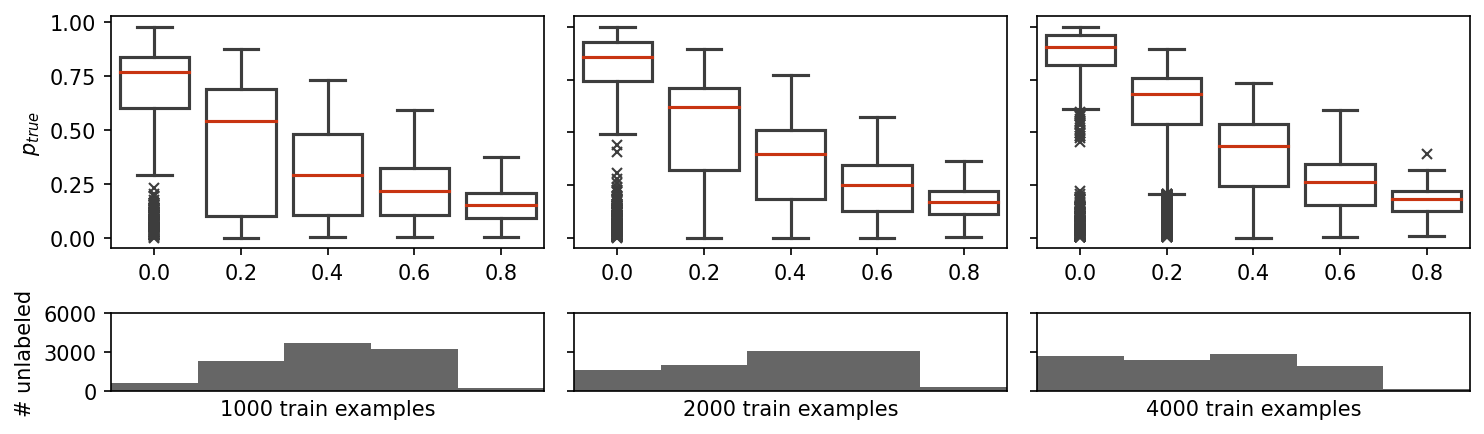

In [4]:
ce_1000 = np.load("swa_1000.npy")
ce_1000_x = np.round(ce_1000[0], 2)
ce_2000 = np.load("swa_2000.npy")
ce_2000_x = np.round(ce_2000[0], 2)
ce_4000 = np.load("swa_4000.npy")
ce_4000_x = np.round(ce_4000[0], 2)

fig, axes = plt.subplots(2, 3, gridspec_kw={'height_ratios': [3, 1]}, dpi=150, figsize=(10, 3))

PROPS = {
    'boxprops': {'facecolor':'none'},
    'medianprops': {'color':'#C83411'},
    'flierprops': {"marker": "x"},
}

bx0 = sns.boxplot(ax=axes[0][0], x=ce_1000_x, y=ce_1000[1], **PROPS)
bx1 = sns.boxplot(ax=axes[0][1], x=ce_2000_x, y=ce_2000[1], **PROPS)
bx2 = sns.boxplot(ax=axes[0][2], x=ce_4000_x, y=ce_4000[1], **PROPS)

axes[0][0].set_ylabel(r"$p_{true}$")
bx1.set(yticklabels=[])
bx2.set(yticklabels=[])

axes[1][0].bar(x=[0., 0.2, 0.4, 0.6, 0.8], height=[ 568, 2273, 3666, 3258,  235], width=0.2, align='edge', color='#666666')
axes[1][1].bar(x=[0., 0.2, 0.4, 0.6, 0.8], height=[1568, 1965, 3092, 3082,  293], width=0.2, align='edge', color='#666666')
axes[1][2].bar(x=[0., 0.2, 0.4, 0.6, 0.8], height=[2707, 2385, 2845, 1952,  111], width=0.2, align='edge', color='#666666')

axes[1][0].set_xlim((0., 1.0))
axes[1][1].set_xlim((0., 1.0))
axes[1][2].set_xlim((0., 1.0))

axes[1][0].set_ylabel(r"# unlabeled")
axes[1][0].set_yticks([0, 3000, 6000])
axes[1][1].set_yticks([0, 3000, 6000])
axes[1][2].set_yticks([0, 3000, 6000])

axes[1][1].set_yticklabels([])
axes[1][2].set_yticklabels([])

axes[1][0].set_xticks([])
axes[1][1].set_xticks([])
axes[1][2].set_xticks([])

axes[1][0].set_xlabel("1000 train examples")
axes[1][1].set_xlabel("2000 train examples")
axes[1][2].set_xlabel("4000 train examples")

fig.tight_layout()
fig.savefig("ce_vr_prob_boxplot_hist.pdf")